In [4]:
import matplotlib.pyplot as plt

## Inference time for ExpansionNet vs ClipClap


In [2]:
ExpansionNetInference=1.01877
ClipClapInference = 0.366+0.415+0.209+0.503+0.317+0.206

In [10]:
ClipClapInference/ExpansionNetInference - 1

0.9788568567979035

Text(0.5, 1.0, 'Inference time - ExpansionNetV2 vs ClipClap\n Around 97.8% faster')

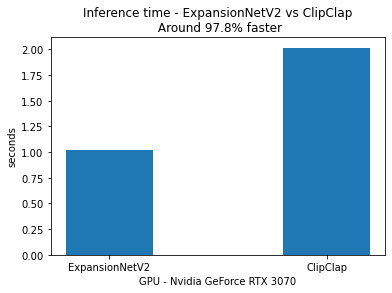

In [14]:
bar_data={"ExpansionNetV2":ExpansionNetInference,"ClipClap":ClipClapInference}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.ylabel("seconds")
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("Inference time - ExpansionNetV2 vs ClipClap\n Around 97.8% faster")

Bleu score for ExpansionNetV2

In [12]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

In [7]:
ACTUALS=["two elephants walking in a grassy flat area",
            "a tennis player getting ready to hit a ball",
            "a group of large boats is parts at a city marina",
            "a man standing next to a man in a bathroom",
            "a herd of cattle are standing and grazing in a field",
            "men standing in a street next to a car and a large bus",
            "a train moves past a cement station platform",
            "a long railroad train carrying several cars behind it",
            "a man on a motor bike on a street",
            "a jumbo jet airplane coming in for a landing on a runway"]

PRED_CLIPCLAP=["elephants in the wild ",
                "tennis player in action during his first round match against tennis player",
                "aerial view of the port",
                "person, left, and person look at each other in the locker room",
                "cattle graze in a pasture",
                "passengers boarding a bus at a bus station",
                "a train on the line",
                "a train passes through australian local government area",
                "a police officer on a scooter",
                "aircraft model on the runway"]

PRED_EXPANSIONNET=["Two elephants walking in the grass in a field",
                    "A man holding a tennis racket on a tennis court",
                    "A group of boats are parked in the water at a beach",
                    "Two men in ties standing in front of a bathroom mirror",
                    "A herd of cows grazing in a field",
                    "A group of people standing on top of a car with a bus",
                    "A train is on the tracks at a train station",
                    "A train is on the tracks in a field",
                    "A police officer riding a motorcycle on a city street",
                    "A large airplane taking off from an airport runway"]

In [27]:
AVG_BLEU_CLIPCLAP=0
for candidate in PRED_CLIPCLAP:
    bleu=sentence_bleu(ACTUALS, candidate)
    AVG_BLEU_CLIPCLAP+=bleu
AVG_BLEU_CLIPCLAP/=10
print(AVG_BLEU_CLIPCLAP)

0.011124967107243788


In [28]:
AVG_BLEU_EXP=0
for candidate in PRED_EXPANSIONNET:
    bleu=sentence_bleu(ACTUALS, candidate)
    AVG_BLEU_EXP+=bleu
AVG_BLEU_EXP/=10
print(AVG_BLEU_EXP)

0.04111336169005197


In [29]:
ACTUALS=["two elephants walking in a grassy flat area",
            "a tennis player getting ready to hit a ball",
            "a group of large boats is parts at a city marina",
            "a man standing next to a man in a bathroom",
            "a herd of cattle are standing and grazing in a field",
            "men standing in a street next to a car and a large bus",
            "a train moves past a cement station platform",
            "a long railroad train carrying several cars behind it",
            "a man on a motor bike on a street",
            "a jumbo jet airplane coming in for a landing on a runway"]

PRED_CLIPCLAP=["elephants in the wild ",
                "tennis player in action during his first round match against tennis player",
                "aerial view of the port",
                "person, left, and person look at each other in the locker room",
                "cattle graze in a pasture",
                "passengers boarding a bus at a bus station",
                "a train on the line",
                "a train passes through australian local government area",
                "a police officer on a scooter",
                "aircraft model on the runway"]

PRED_EXPANSIONNET=["Two elephants walking in the grass in a field",
                    "A man holding a tennis racket on a tennis court",
                    "A group of boats are parked in the water at a beach",
                    "Two men in ties standing in front of a bathroom mirror",
                    "A herd of cows grazing in a field",
                    "A group of people standing on top of a car with a bus",
                    "A train is on the tracks at a train station",
                    "A train is on the tracks in a field",
                    "A police officer riding a motorcycle on a city street",
                    "A large airplane taking off from an airport runway"]

In [35]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
AVG_ROUGE_1_precision=0
AVG_ROUGE_1_recall=0
AVG_ROUGE_L_precision=0
AVG_ROUGE_L_recall=0

for i  in range(10):
    scores=scorer.score(ACTUALS[i], PRED_CLIPCLAP[i])
    AVG_ROUGE_1_precision+=scores['rouge1'].precision
    AVG_ROUGE_L_precision+=scores['rougeL'].precision

    AVG_ROUGE_1_recall+=scores['rouge1'].recall
    AVG_ROUGE_L_recall+=scores['rougeL'].recall
print(AVG_ROUGE_1_precision)
print(AVG_ROUGE_L_precision)
print(AVG_ROUGE_1_recall)
print(AVG_ROUGE_L_recall)


3.675
3.675
2.2297591297591297
2.2297591297591297


In [36]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
AVG_ROUGE_1_precision=0
AVG_ROUGE_1_recall=0
AVG_ROUGE_L_precision=0
AVG_ROUGE_L_recall=0

for i  in range(10):
    scores=scorer.score(ACTUALS[i], PRED_EXPANSIONNET[i])
    AVG_ROUGE_1_precision+=scores['rouge1'].precision
    AVG_ROUGE_L_precision+=scores['rougeL'].precision

    AVG_ROUGE_1_recall+=scores['rouge1'].recall
    AVG_ROUGE_L_recall+=scores['rougeL'].recall
print(AVG_ROUGE_1_precision)
print(AVG_ROUGE_L_precision)
print(AVG_ROUGE_1_recall)
print(AVG_ROUGE_L_recall)


4.511285936285936
4.434362859362859
4.529467754467754
4.452544677544678
